In [12]:
#import libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [13]:
#load Dataset
data = pd.read_csv('car_age_price.csv')


In [14]:
#quick view about the dataset
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

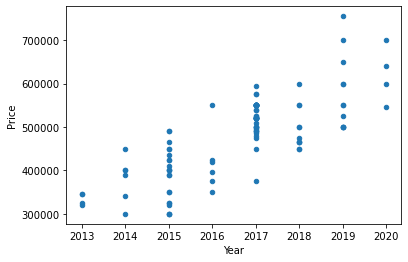

In [17]:
data.plot(kind='scatter',x='Year',y='Price')
plt.show()

In [21]:
data.corr()#correlation coefficients 

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [32]:
y = data['Year']
x = data.drop('Year', axis=1)

### Linear Regression 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2
                                                  ,random_state=42)

In [36]:
#creating the model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [37]:
y_pred = model.predict(x_test)

In [38]:
y_pred

array([2017.10269352, 2016.7000756 , 2016.29745767, 2016.09614871,
       2017.43820846, 2014.08305909, 2017.43820846, 2016.76717858,
       2016.76717858, 2017.43820846, 2014.35147104, 2017.43820846,
       2016.29745767, 2018.64606223, 2016.29745767, 2016.76717858,
       2014.68698597, 2015.29091286, 2015.0896039 , 2017.03559053,
       2017.43820846, 2016.76717858, 2017.43820846])

In [44]:
#model evaluation
from sklearn.metrics import mean_squared_error,r2_score

In [46]:
print('MES is',mean_squared_error(y_test,y_pred))
print('R2 Score is',r2_score(y_test,y_pred))

MES is 1.780211042743283
R2 Score is 0.445387725788459


In [47]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
minmax=MinMaxScaler(feature_range=(0,1))


In [57]:
X1 = minmax.fit_transform(x)

In [58]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2
                                                  ,random_state=42)

In [61]:
lr2 = LinearRegression()
model2 = lr2.fit(x_train,y_train)
y_pred2 = model2.predict(Price)

In [62]:
print('MES is',mean_squared_error(y_test,y_pred))
print('R2 Score is',r2_score(y_test,y_pred))

MES is 1.780211042743283
R2 Score is 0.445387725788459


### Lasso Regression

In [63]:
from sklearn.linear_model import Lasso

In [68]:
lasso=Lasso(alpha=0.1)
lasso_coef = lasso.fit(x,y).coef_

ValueError: x and y must have same first dimension, but have shapes (112,) and (1,)

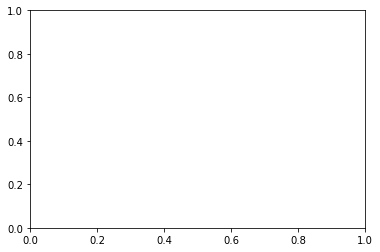

In [69]:
_=plt.plot(range(len(data)),lasso_coef)
_=plt.xticks(range(len(data)),data,rotation=60)
plt.show()

In [70]:
#Cannot complete Lasso Regression and i think Linear Regression is better 